In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
r_data = pd.read_csv("raw_data.csv")
t_data = pd.read_csv("transformed_data.csv")
print(r_data)
print(t_data)

      iso_code     location        date  total_cases  total_deaths  \
0          AFG  Afghanistan  2019-12-31          0.0           0.0   
1          AFG  Afghanistan  2020-01-01          0.0           0.0   
2          AFG  Afghanistan  2020-01-02          0.0           0.0   
3          AFG  Afghanistan  2020-01-03          0.0           0.0   
4          AFG  Afghanistan  2020-01-04          0.0           0.0   
...        ...          ...         ...          ...           ...   
50413      ZWE     Zimbabwe  2020-10-15       8055.0         231.0   
50414      ZWE     Zimbabwe  2020-10-16       8075.0         231.0   
50415      ZWE     Zimbabwe  2020-10-17       8099.0         231.0   
50416      ZWE     Zimbabwe  2020-10-18       8110.0         231.0   
50417      ZWE     Zimbabwe  2020-10-19       8147.0         231.0   

       stringency_index  population  gdp_per_capita  human_development_index  \
0                  0.00    38928341        1803.987                    0.498   

## Data preparation


In [3]:
t_data["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

### Aggregating Data

In [4]:
code = t_data["CODE"].unique().tolist()
country = t_data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
pop = t_data["POP"].unique().tolist()
gdp = []

In [5]:
mode = t_data["COUNTRY"].value_counts().mode()
print(mode)

0    294
Name: COUNTRY, dtype: int64


In [6]:
for i in country:
    hdi.append((t_data.loc[t_data["COUNTRY"] == i, "HDI"]).sum()/mode)
    tc.append((r_data.loc[r_data["location"] == i, "total_cases"]).sum())
    td.append((r_data.loc[r_data["location"]== i, "total_deaths"]).sum())
    sti.append((t_data.loc[t_data["COUNTRY"] == i, "STI"]).sum()/mode)
    pop.append((r_data.loc[r_data["location"] == i, "population"]).sum()/mode)
aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, pop)), 
                                   columns = ["Country Code", "Country", "HDI",
                                              "Total Cases", "Total Deaths",
                                              "Stringency Index", "Population"])
print(aggregated_data.head())
    

  Country Code      Country                                          HDI  \
0          AFG  Afghanistan     0    0.498
Name: COUNTRY, dtype: float64   
1          ALB      Albania  0    0.600765
Name: COUNTRY, dtype: float64   
2          DZA      Algeria     0    0.754
Name: COUNTRY, dtype: float64   
3          AND      Andorra  0    0.659551
Name: COUNTRY, dtype: float64   
4          AGO       Angola  0    0.418952
Name: COUNTRY, dtype: float64   

   Total Cases  Total Deaths                             Stringency Index  \
0    5126433.0      165875.0  0    3.049673
Name: COUNTRY, dtype: float64   
1    1071951.0       31056.0  0    3.005624
Name: COUNTRY, dtype: float64   
2    4893999.0      206429.0  0    3.195168
Name: COUNTRY, dtype: float64   
3     223576.0        9850.0  0    2.677654
Name: COUNTRY, dtype: float64   
4     304005.0       11820.0   0    2.96556
Name: COUNTRY, dtype: float64   

   Population  
0   17.477233  
1   14.872537  
2   17.596309  
3   11.254996  


In [7]:
data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
data =data.head(10)
print(data)

    Country Code         Country                                          HDI  \
200          USA   United States     0    0.924
Name: COUNTRY, dtype: float64   
27           BRA          Brazil     0    0.759
Name: COUNTRY, dtype: float64   
90           IND           India      0    0.64
Name: COUNTRY, dtype: float64   
157          RUS          Russia     0    0.816
Name: COUNTRY, dtype: float64   
150          PER            Peru   0    0.59949
Name: COUNTRY, dtype: float64   
125          MEX          Mexico     0    0.774
Name: COUNTRY, dtype: float64   
178          ESP           Spain  0    0.887969
Name: COUNTRY, dtype: float64   
175          ZAF    South Africa  0    0.608653
Name: COUNTRY, dtype: float64   
42           COL        Colombia  0    0.581847
Name: COUNTRY, dtype: float64   
199          GBR  United Kingdom     0    0.922
Name: COUNTRY, dtype: float64   

     Total Cases  Total Deaths                             Stringency Index  \
200  746014098.0    26477574.

In [8]:
country_name = data['Country']
cases = data['Total Cases']

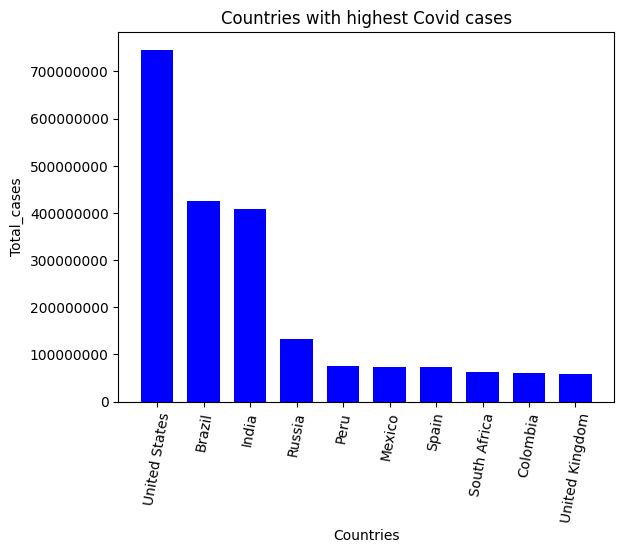

In [9]:
fig = plt.bar(country_name,cases, color = 'blue', width = 0.7)
plt.xticks(country_name, rotation = 80)
plt.xlabel("Countries")
plt.ylabel("Total_cases")
plt.title("Countries with highest Covid cases")
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

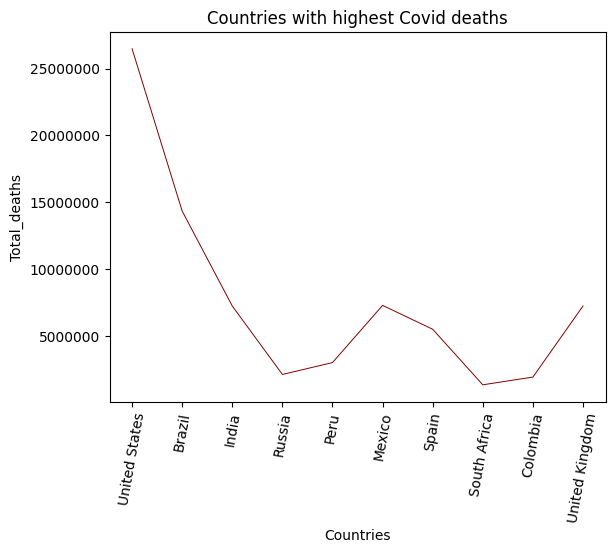

In [10]:
fig2 = plt.plot(country_name, data["Total Deaths"] , color = 'maroon', linewidth = 0.7)
plt.xticks(country_name, rotation = 80)
plt.xlabel("Countries")
plt.ylabel("Total_deaths")
plt.title("Countries with highest Covid deaths")
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

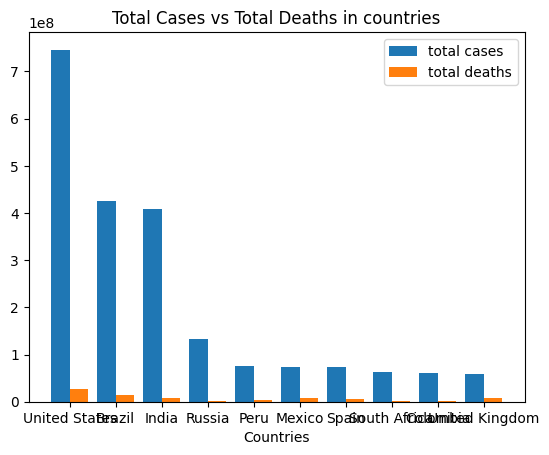

In [11]:
X_axis = np.arange(len(country_name))
plt.bar(X_axis - 0.2, cases, 0.4, label = 'total cases')
plt.bar(X_axis + 0.2, data["Total Deaths"], 0.4, label = 'total deaths')
plt.xticks(X_axis, country_name)
plt.xlabel("Countries")
plt.title("Total Cases vs Total Deaths in countries")
plt.legend()
plt.show()

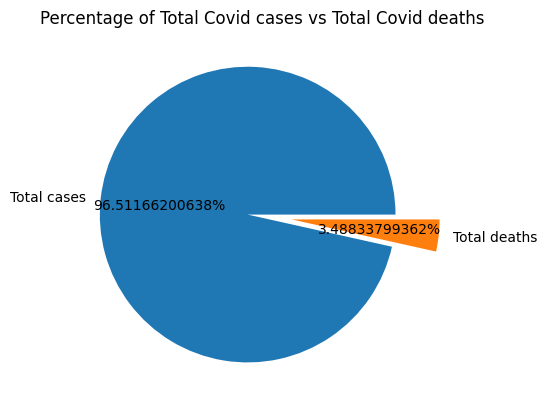

In [12]:
explode = [0.1,0.2]
sum_cases = data['Total Cases'].sum()
sum_deaths = data['Total Deaths'].sum()
plt.pie([sum_cases,sum_deaths], labels=["Total cases","Total deaths"],explode=explode,autopct='%0.11f%%')
plt.title("Percentage of Total Covid cases vs Total Covid deaths")
plt.show()

In [13]:
death_rate = (sum_deaths/sum_cases)*100
print("Death rate", "=", death_rate)

Death rate = 3.6144212045653767


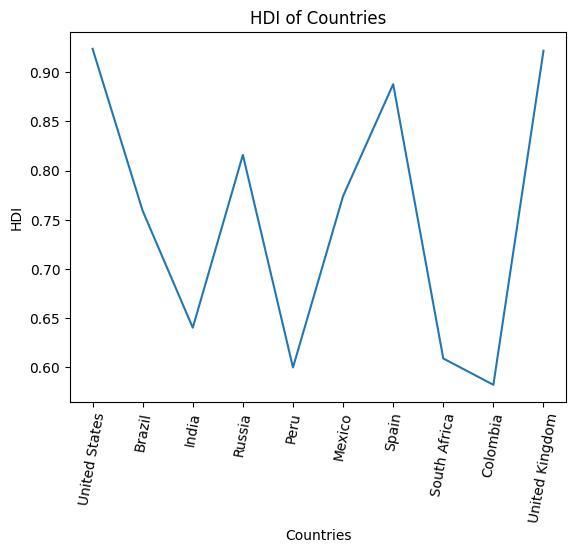

In [14]:
plt.plot(country_name, data['HDI'])
plt.xlabel("Countries")
plt.ylabel("HDI")
plt.title("HDI of Countries")
plt.xticks(country_name, rotation = 80)
plt.show()

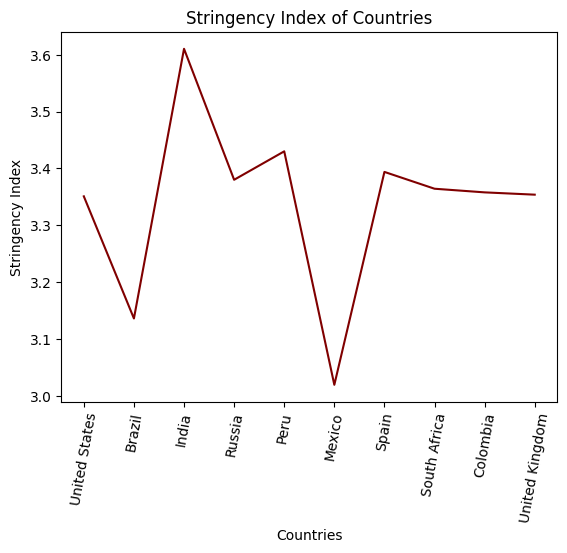

In [15]:
plt.plot(country_name, data['Stringency Index'], color = 'maroon')
plt.xlabel("Countries")
plt.ylabel("Stringency Index")
plt.title("Stringency Index of Countries")
plt.xticks(country_name, rotation = 80)
plt.show()

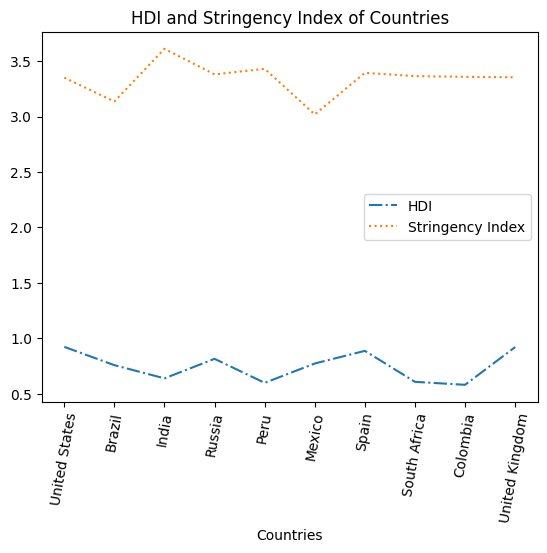

In [16]:
plt.plot(country_name, data['HDI'], label = "HDI", linestyle = "-.")
plt.plot(country_name, data['Stringency Index'], label = "Stringency Index", linestyle = ":")
plt.xlabel("Countries")
plt.legend()
plt.title("HDI and Stringency Index of Countries")
plt.xticks(country_name, rotation = 80)
plt.show()

### exporting dataframe to excel

In [18]:
file_name = "Covid-19_analysis.xlsx"
aggregated_data.to_excel(file_name)
